<a href="https://colab.research.google.com/github/vaibhav688/Netflix-Data-Cleaning-Analysis-and-Visualization/blob/main/Copy_of_NETFLIX_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NETFLIX PROJECT REPORT BY VAIBHAV VAIDYANATHAN**

In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
data=pd.read_csv("/content/netflix1.csv")

In [ ]:
data

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States   9/25/2021          2020  PG-13     90 min   
1            France   9/24/2021          2021  TV-MA   1 Season   
2     United States   9/24/2021          2021  TV-MA   1 Season   
3            Brazil   9/22/2021          2021  TV-PG     91 min   
4     United States   9/24/2021          1993  TV-MA    125 min   
...             ...         ...           ...    ...        ...   
8785         Turkey   1/17/2017          2016  TV-PG  2 Seasons   
8786  United States   9/13/2018          2016  TV-Y7  3 Seasons   
8787       Pakistan  12/15/2016          2012  TV-PG   1 Season   
8788       Pakistan   6/23/2018          2016   TV-Y   1 Season   
8789       Pakistan    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
0                                         Documentaries  
1     Crime TV Shows, International TV Shows, TV Act...  
2                    TV Dramas, TV Horror, TV Mysteries  
3                    Children & Family Movies, Comedies  
4      Dramas, Independent Movies, International Movies  
...                                                 ...  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ...  
8788                                           Kids' TV  
8789                                           Kids' TV  

[8790 rows x 10 columns]

In [ ]:
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States   9/25/2021          2020  PG-13     90 min   
1            France   9/24/2021          2021  TV-MA   1 Season   
2     United States   9/24/2021          2021  TV-MA   1 Season   
3            Brazil   9/22/2021          2021  TV-PG     91 min   
4     United States   9/24/2021          1993  TV-MA    125 min   
...             ...         ...           ...    ...        ...   
8785         Turkey   1/17/2017          2016  TV-PG  2 Seasons   
8786  United States   9/13/2018          2016  TV-Y7  3 Seasons   
8787       Pakistan  12/15/2016          2012  TV-PG   1 Season   
8788       Pakistan   6/23/2018          2016   TV-Y   1 Season   
8789       Pakistan    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
0                                         Documentaries  
1     Crime TV Shows, International TV Shows, TV Act...  
2                    TV Dramas, TV Horror, TV Mysteries  
3                    Children & Family Movies, Comedies  
4      Dramas, Independent Movies, International Movies  
...                                                 ...  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ...  
8788                                           Kids' TV  
8789                                           Kids' TV  

[8790 rows x 10 columns]

**FILL MISSING VALUES**


In [ ]:
data.fillna({'director':'Unknown'}, inplace=True)



In [ ]:

data.fillna({'data_added':'ffill'}, inplace=True)


In [ ]:
data.fillna(data['country'].mode()[0], inplace=True)

**Remove rows with missing rating/duration**


In [ ]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# View clean dataset
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

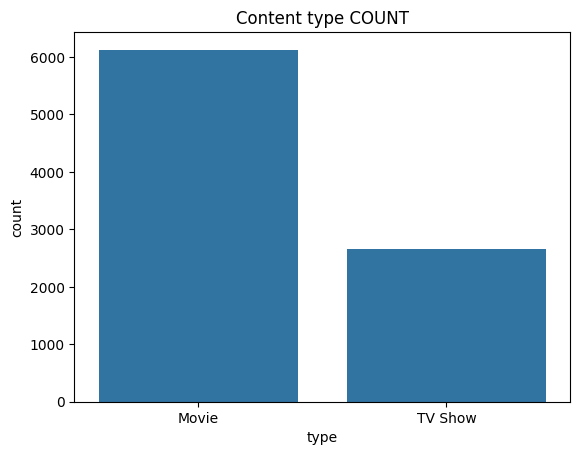

In [ ]:
sns.countplot(x='type',data=data)
plt.title('Content type COUNT')
plt.show()

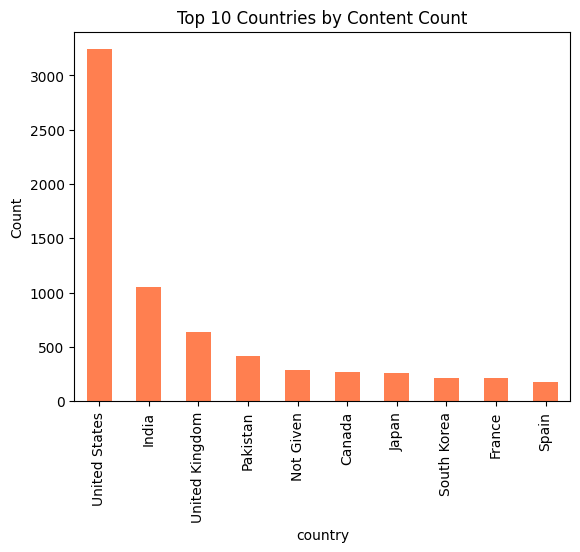

In [ ]:
# Top 10 countries
data['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Content Count')
plt.ylabel('Count')
plt.show()

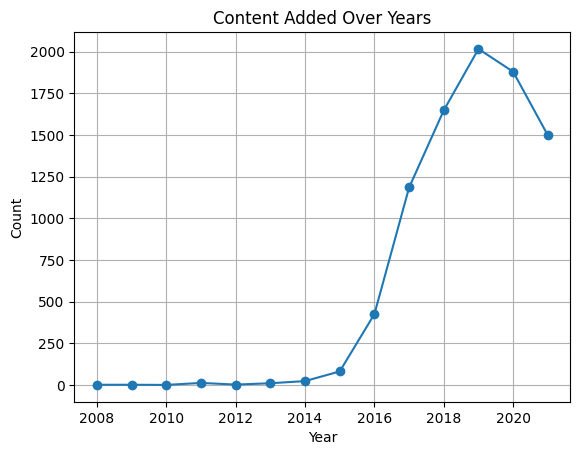

In [ ]:
# Content added over years
data['year_added'] = data['date_added'].dt.year
data['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px
from plotly.offline import iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
type_of_shows = data["type"].value_counts()

fig = px.bar(data_frame=type_of_shows,
             x = type_of_shows.index,
             y = type_of_shows,
             color = type_of_shows.index,
             color_discrete_sequence=["#222", "#E50914"],
             text_auto= True,
             title= "Show Type Frequency",
             labels = {
                    "y" : "Frequency",
                    "index" : "Show Type"
                }
            )

# Custom Format of numbers
fig.update_traces(insidetextfont = {
    "family": "consolas",
    "size": 15,

})

iplot(fig)


<Axes: xlabel='director', ylabel='country'>

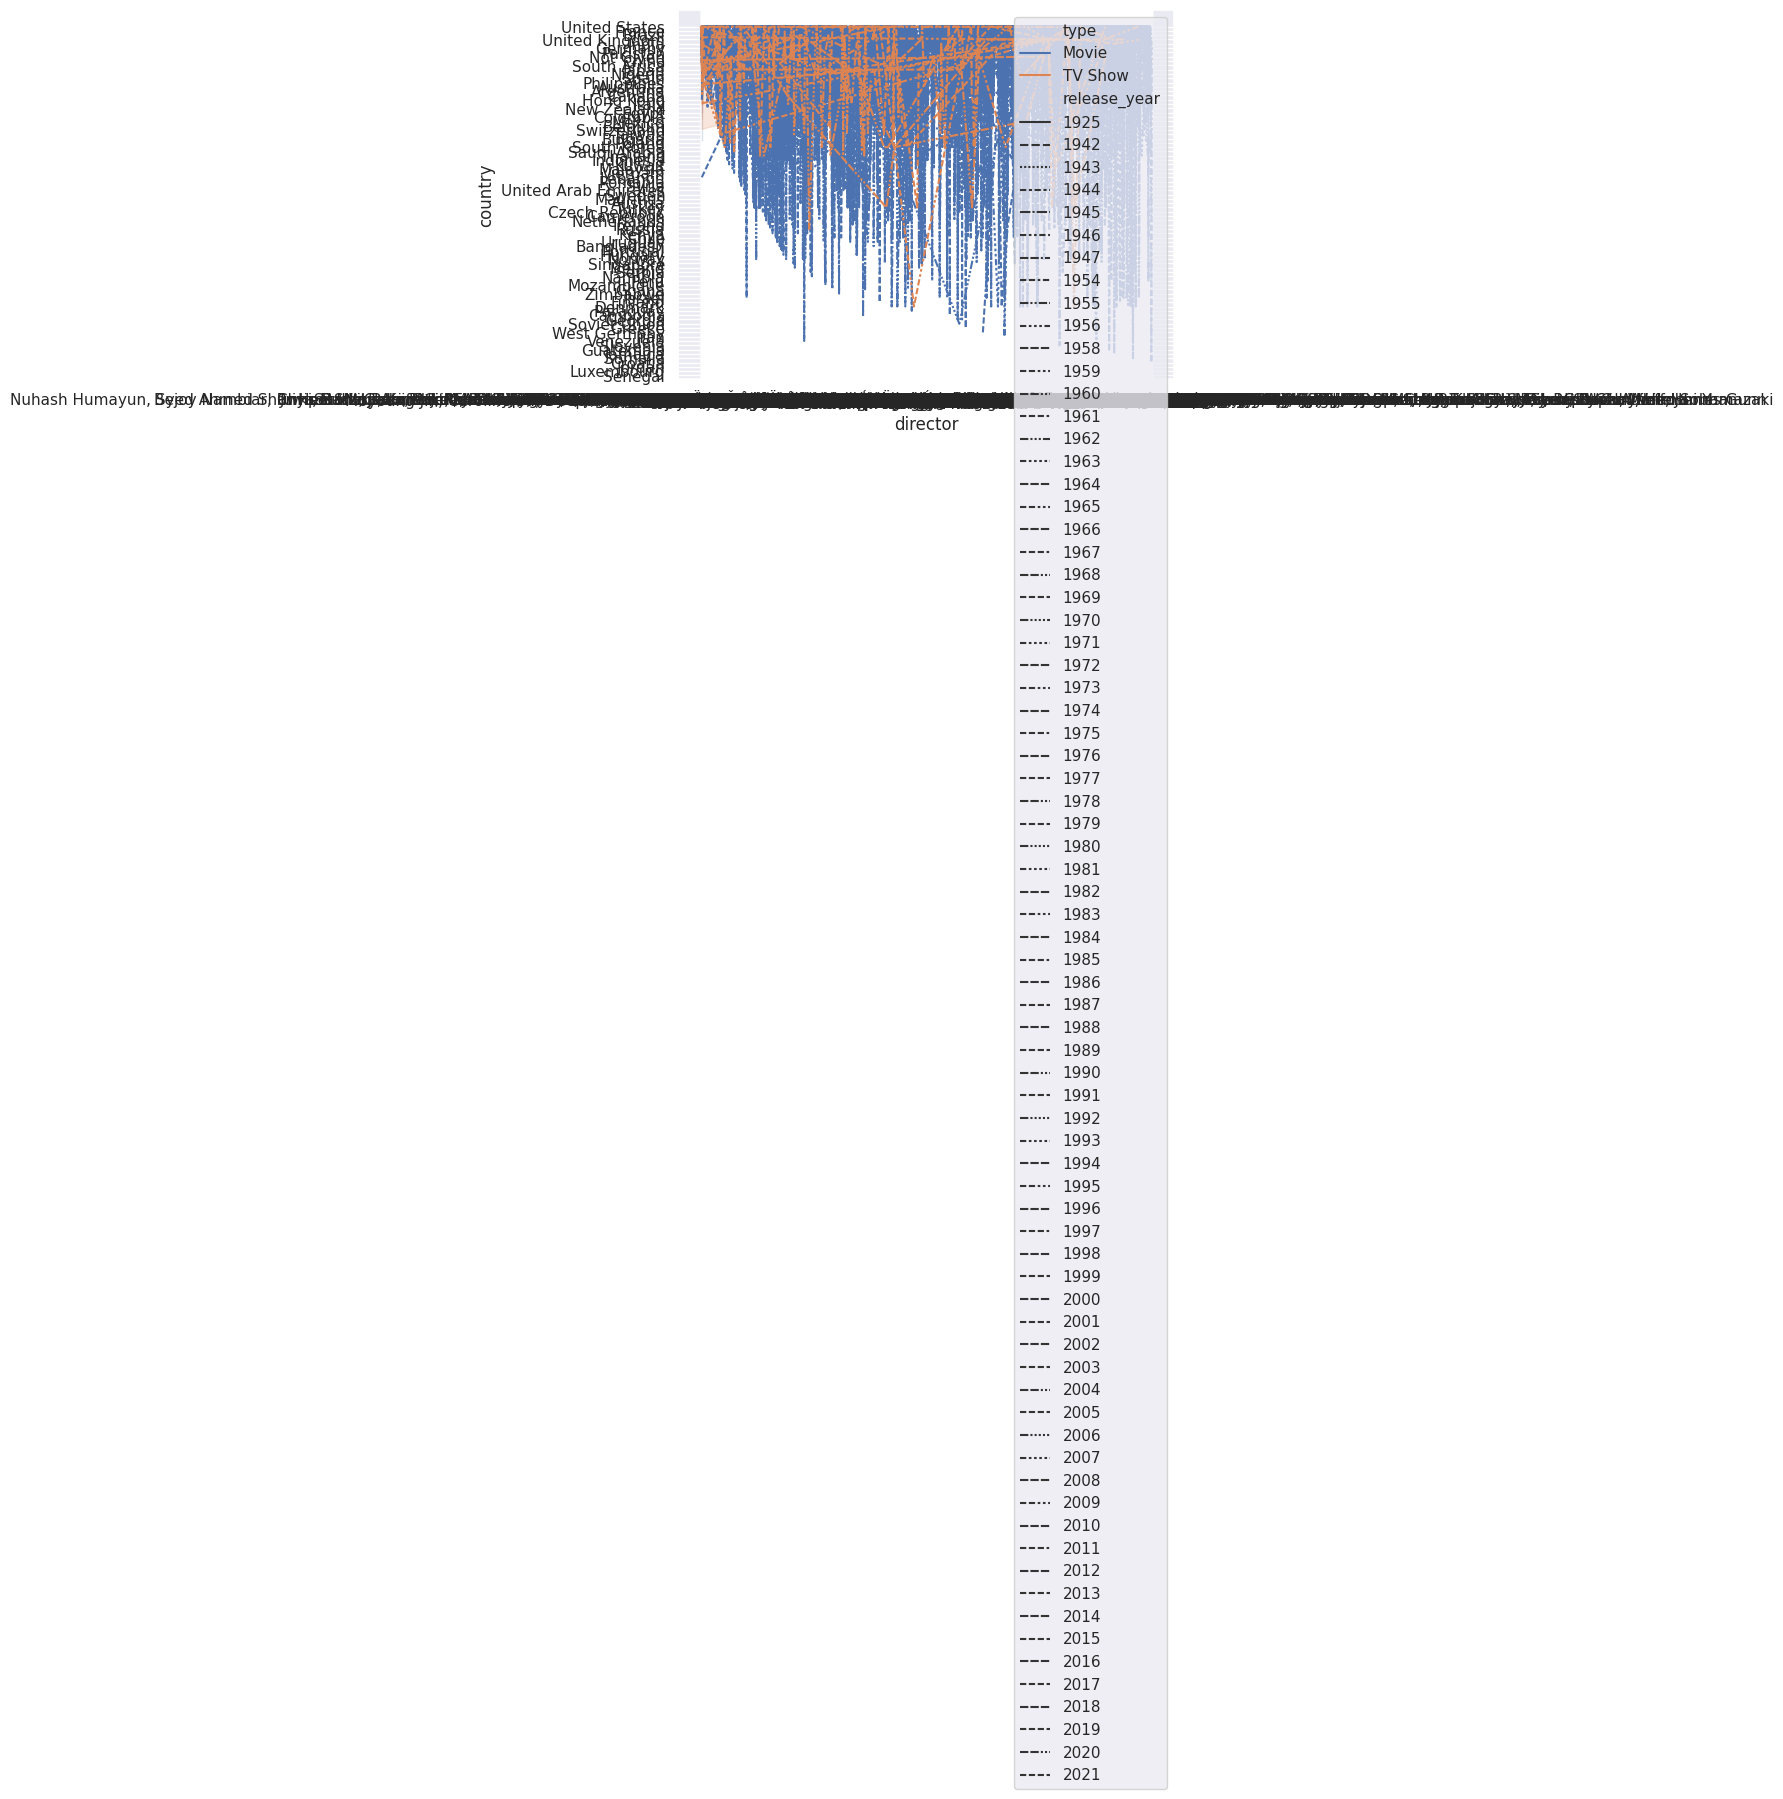

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="director",y="country",hue="type",style="release_year",data=data)

/tmp/ipython-input-2368132481.py:11: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



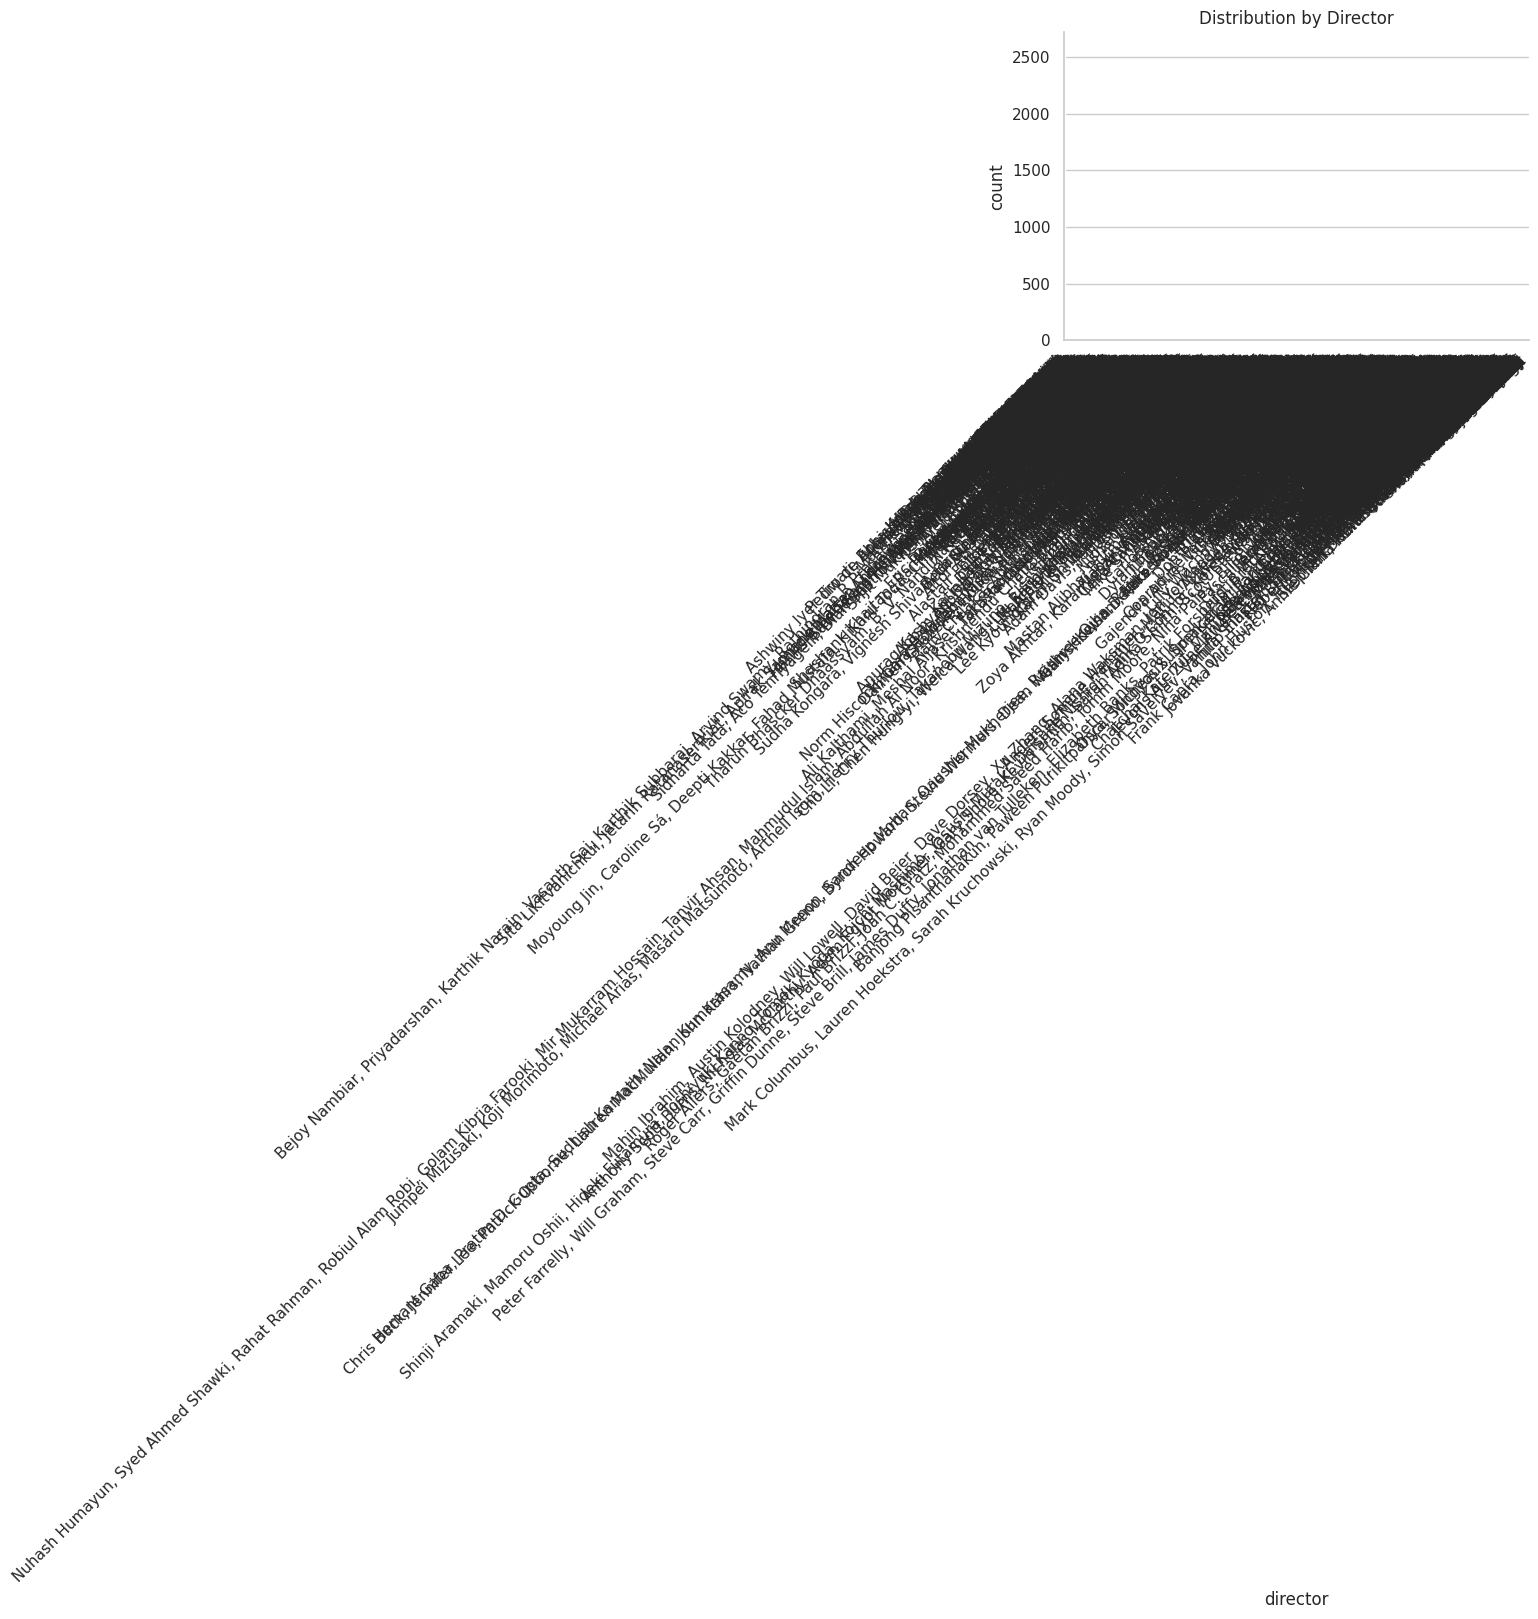

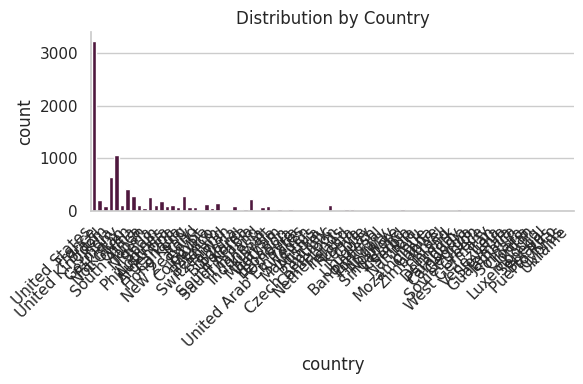

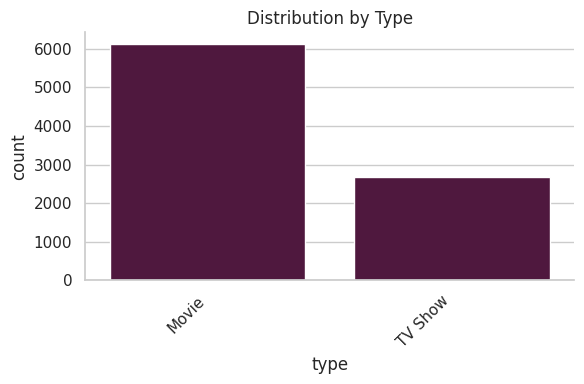

In [ ]:


sns.set_theme(style="whitegrid")

cols = ["director", "country", "type"]

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, color="xkcd:plum")
    plt.title(f"Distribution by {col.capitalize()}")
    plt.xticks(rotation=45, ha="right")
    sns.despine()
    plt.tight_layout()
    plt.show()

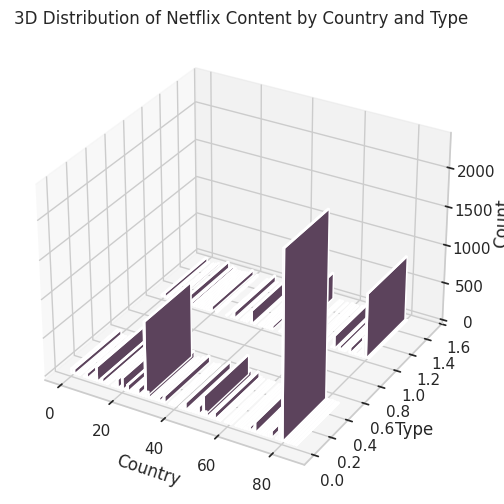

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Count occurrences
counts = data.groupby(["country", "type"]).size().reset_index(name="count")

# Convert to numeric for plotting
countries = counts["country"].astype("category").cat.codes
types = counts["type"].astype("category").cat.codes
values = counts["count"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.bar3d(countries, types, np.zeros_like(values), 0.5, 0.5, values, shade=True, color="plum")

ax.set_xlabel("Country")
ax.set_ylabel("Type")
ax.set_zlabel("Count")
plt.title("3D Distribution of Netflix Content by Country and Type")
plt.show()


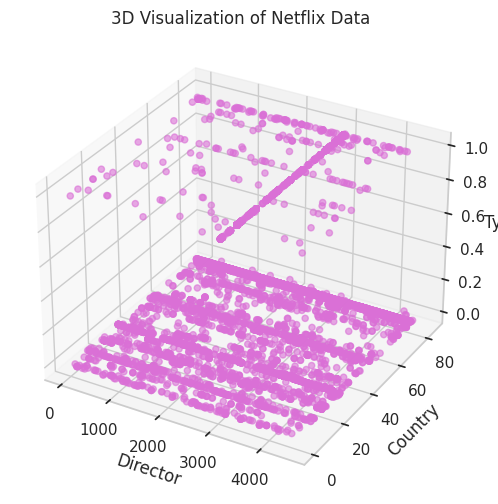

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Example data


# Fill missing to avoid errors
data = data.fillna("Unknown")

# Encode categorical columns numerically
enc = LabelEncoder()
data["director_enc"] = enc.fit_transform(data["director"])
data["country_enc"] = enc.fit_transform(data["country"])
data["type_enc"] = enc.fit_transform(data["type"])

# Create 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["director_enc"], data["country_enc"], data["type_enc"], c="orchid", alpha=0.6)

ax.set_xlabel("Director")
ax.set_ylabel("Country")
ax.set_zlabel("Type")
plt.title("3D Visualization of Netflix Data")
plt.show()


In [ ]:
import plotly.graph_objects as go

# Example: Pie of type or country
counts = data["rating"].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=counts.index,
    values=counts.values,
    hole=0.2,  # donut look
)])

fig.update_traces(textinfo="percent+label", pull=[0.05]*len(counts), marker=dict(line=dict(color='white', width=2)))
fig.update_layout(title_text="Netflix Director Distribution (3D Style)", showlegend=True)

fig.show()


In [ ]:
data

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2021-09-25          2020  PG-13     90 min   
1            France 2021-09-24          2021  TV-MA   1 Season   
2     United States 2021-09-24          2021  TV-MA   1 Season   
3            Brazil 2021-09-22          2021  TV-PG     91 min   
4     United States 2021-09-24          1993  TV-MA    125 min   
...             ...        ...           ...    ...        ...   
8785         Turkey 2017-01-17          2016  TV-PG  2 Seasons   
8786  United States 2018-09-13          2016  TV-Y7  3 Seasons   
8787       Pakistan 2016-12-15          2012  TV-PG   1 Season   
8788       Pakistan 2018-06-23          2016   TV-Y   1 Season   
8789       Pakistan 2018-06-07          2016  TV-Y7   1 Season   

                                              listed_in  year_added  \
0                                         Documentaries        2021   
1     Crime TV Shows, International TV Shows, TV Act...        2021   
2                    TV Dramas, TV Horror, TV Mysteries        2021   
3                    Children & Family Movies, Comedies        2021   
4      Dramas, Independent Movies, International Movies        2021   
...                                                 ...         ...   
8785                  International TV Shows, TV Dramas        2017   
8786                                           Kids' TV        2018   
8787  International TV Shows, Romantic TV Shows, TV ...        2016   
8788                                           Kids' TV        2018   
8789                                           Kids' TV        2018   

      director_enc  country_enc  type_enc  
0             2294           80         0  
1             2104           20         1  
2             2865           80         1  
3              627            6         0  
4             1503           80         0  
...            ...          ...       ...  
8785          3066           76         1  
8786          3066           80         1  
8787          3066           52         1  
8788          3066           52         1  
8789          3066           52         1  

[8790 rows x 14 columns]

In [ ]:
# Example: top 5 countries by show count
top_countries = data["country"].value_counts().head(5).index
subset = data[data["country"].isin(top_countries)]

fig = px.sunburst(
    subset,
    path=['country', 'type'],  # hierarchy: Country → Type
    values='release_year',           # or count if needed
    color='type',
    title="Netflix Shows: Country vs Type"
)

fig.show()

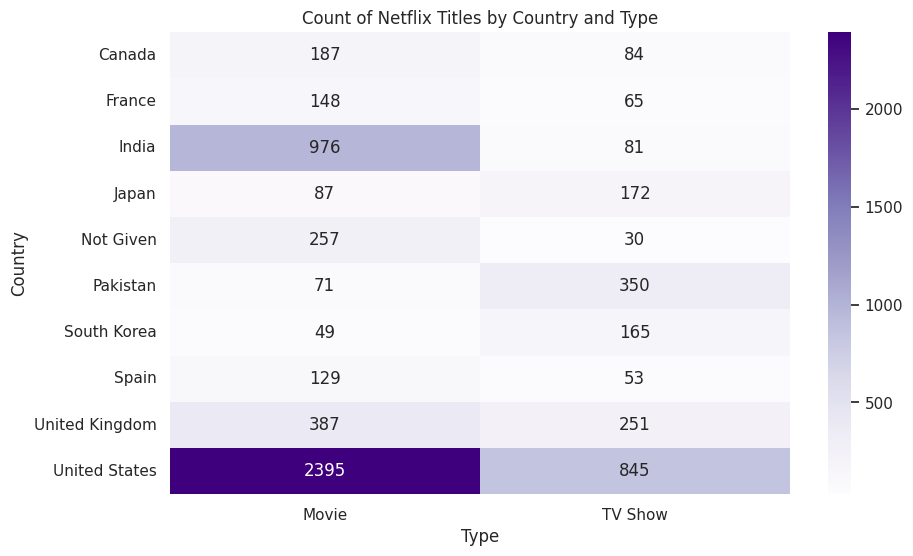

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_filled = data.fillna("Unknown")

# pick top 10 countries for clarity
top_countries = data_filled["country"].value_counts().head(10).index

# create cross-tab (counts)
cross_tab = pd.crosstab(data_filled[data_filled["country"].isin(top_countries)]["country"],
                        data_filled["type"])

plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Purples")
plt.title("Count of Netflix Titles by Country and Type")
plt.ylabel("Country")
plt.xlabel("Type")
plt.show()



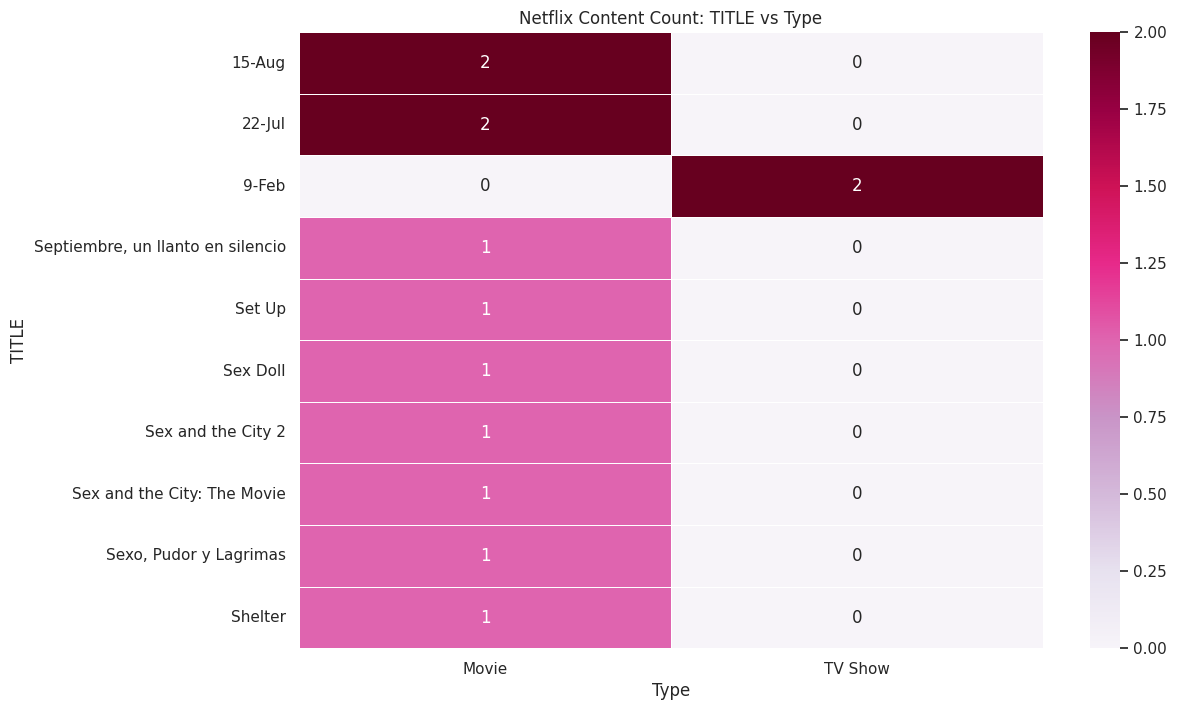

In [ ]:
top_title = data["title"].value_counts().head(10).index
cross_tab = pd.crosstab(data_filled[data_filled["title"].isin(top_title)]["title"],
                        data_filled["type"])
plt.figure(figsize=(12,8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="PuRd", linewidths=0.5)
plt.title("Netflix Content Count: TITLE vs Type")
plt.ylabel("TITLE")
plt.xlabel("Type")
plt.show()

In [ ]:
data

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2021-09-25          2020  PG-13     90 min   
1            France 2021-09-24          2021  TV-MA   1 Season   
2     United States 2021-09-24          2021  TV-MA   1 Season   
3            Brazil 2021-09-22          2021  TV-PG     91 min   
4     United States 2021-09-24          1993  TV-MA    125 min   
...             ...        ...           ...    ...        ...   
8785         Turkey 2017-01-17          2016  TV-PG  2 Seasons   
8786  United States 2018-09-13          2016  TV-Y7  3 Seasons   
8787       Pakistan 2016-12-15          2012  TV-PG   1 Season   
8788       Pakistan 2018-06-23          2016   TV-Y   1 Season   
8789       Pakistan 2018-06-07          2016  TV-Y7   1 Season   

                                              listed_in  year_added  \
0                                         Documentaries        2021   
1     Crime TV Shows, International TV Shows, TV Act...        2021   
2                    TV Dramas, TV Horror, TV Mysteries        2021   
3                    Children & Family Movies, Comedies        2021   
4      Dramas, Independent Movies, International Movies        2021   
...                                                 ...         ...   
8785                  International TV Shows, TV Dramas        2017   
8786                                           Kids' TV        2018   
8787  International TV Shows, Romantic TV Shows, TV ...        2016   
8788                                           Kids' TV        2018   
8789                                           Kids' TV        2018   

      director_enc  country_enc  type_enc  
0             2294           80         0  
1             2104           20         1  
2             2865           80         1  
3              627            6         0  
4             1503           80         0  
...            ...          ...       ...  
8785          3066           76         1  
8786          3066           80         1  
8787          3066           52         1  
8788          3066           52         1  
8789          3066           52         1  

[8790 rows x 14 columns]

In [ ]:
data["genre_count"] = data["listed_in"].apply(lambda x: len(str(x).split(",")))


In [ ]:
def get_duration(years):
    if  "min" in str(years):
        return int(str(years).split()[0])
    else:
        return None
data["duration_min"]=data["duration"].apply(get_duration)

In [ ]:
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")
data["year_added"] = data["date_added"].dt.year
data["month_added"] = data["date_added"].dt.month


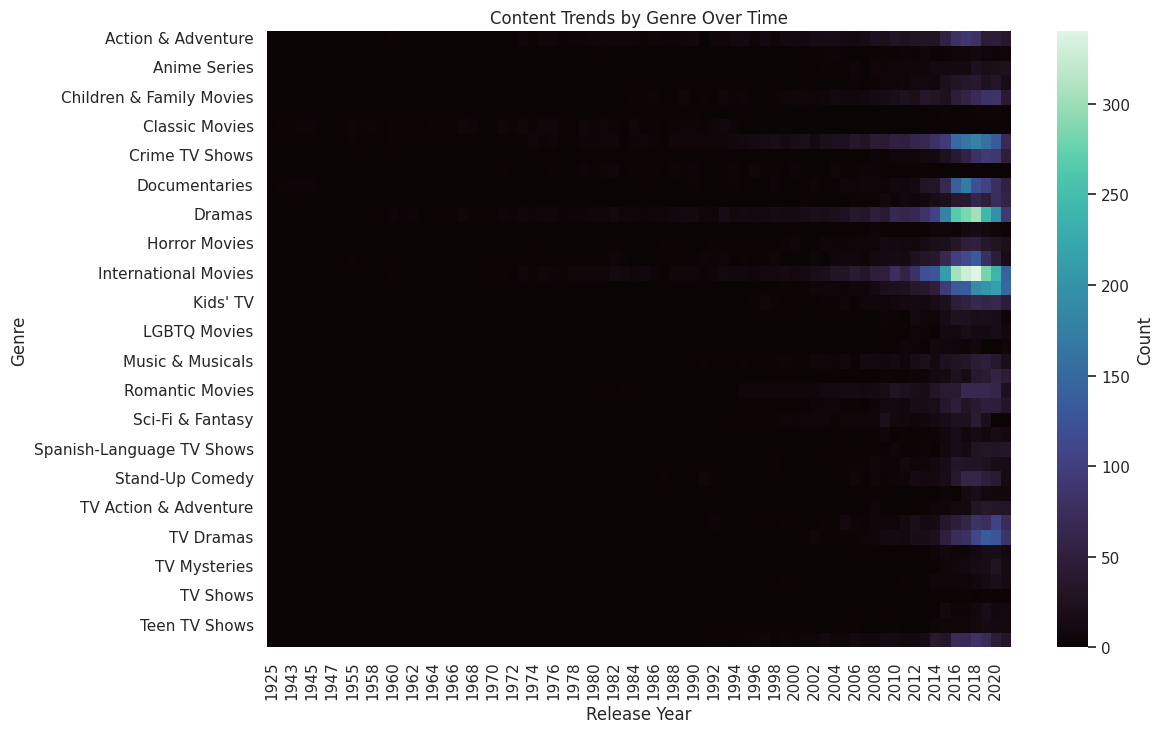

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# explode genres
data_genres = data.assign(genre=data['listed_in'].str.split(',')).explode('genre')
data_genres["genre"] = data_genres["genre"].str.strip()

pivot = pd.crosstab(data_genres["genre"], data_genres["release_year"])

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="mako", cbar_kws={'label': 'Count'})
plt.title("Content Trends by Genre Over Time")
plt.ylabel("Genre")
plt.xlabel("Release Year")
plt.show()


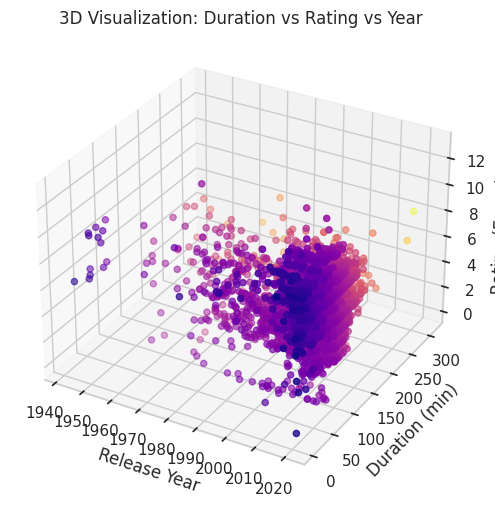

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["release_year"], data["duration_min"], data["rating"].astype('category').cat.codes,
           c=data["duration_min"], cmap='plasma')

ax.set_xlabel("Release Year")
ax.set_ylabel("Duration (min)")
ax.set_zlabel("Rating (Encoded)")
plt.title("3D Visualization: Duration vs Rating vs Year")
plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter(data, x="release_year", y="duration_min", color="type",
                 hover_data=["title", "director"], title="Interactive Duration vs Year")
fig.show()


/tmp/ipython-input-1340027710.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




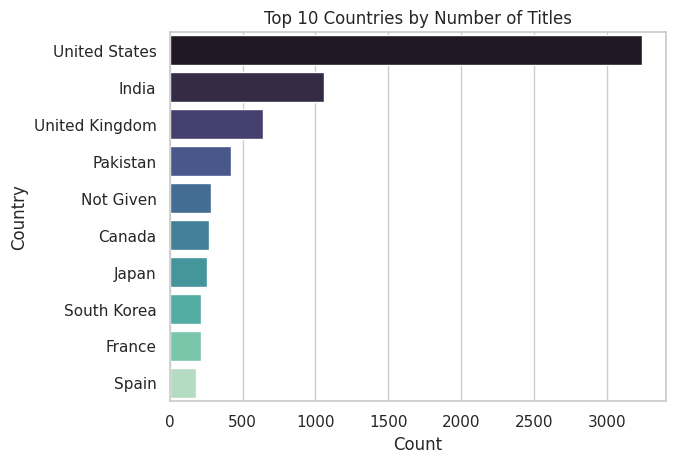

In [ ]:
top_countries=data["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

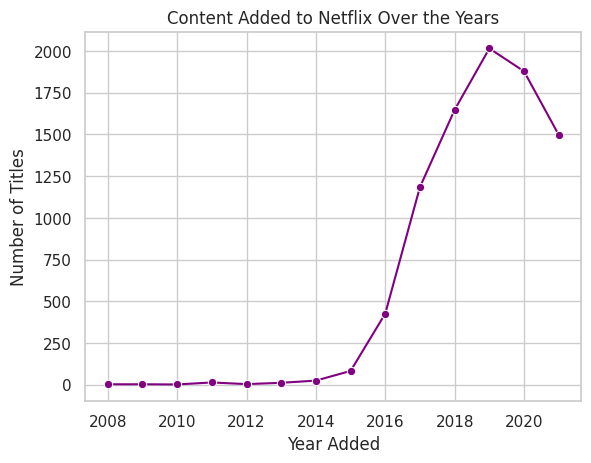

In [ ]:
content_by_year = data['year_added'].value_counts().sort_index()
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker="o", color="purple")
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


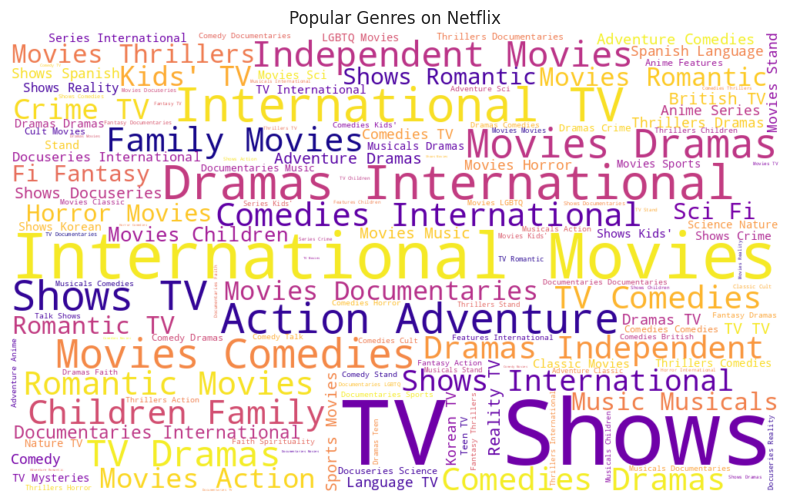

In [ ]:
from wordcloud import WordCloud

text = " ".join(data['listed_in'].dropna().astype(str))
wc = WordCloud(width=1000, height=600, background_color="white", colormap="plasma").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Popular Genres on Netflix")
plt.show()


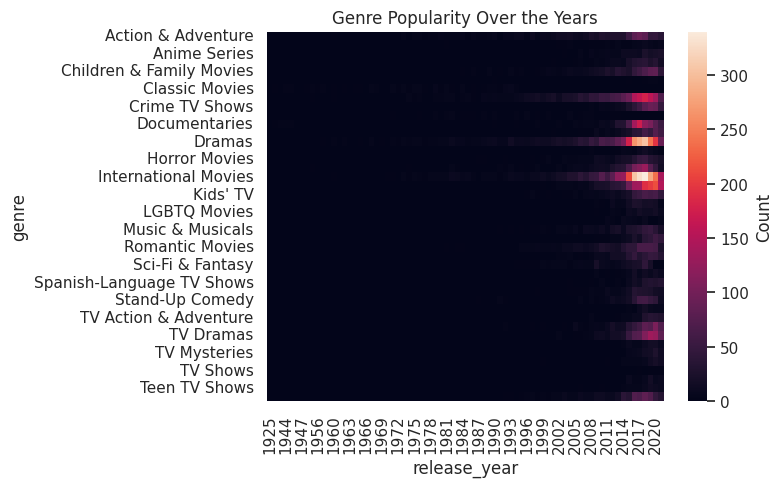

In [ ]:
data_genres = data.assign(genre=data['listed_in'].str.split(',')).explode('genre')
data_genres['genre'] = data_genres['genre'].str.strip()
pivot = pd.crosstab(data_genres['genre'], data_genres['release_year'])

sns.heatmap(pivot, cmap="rocket", cbar_kws={'label': 'Count'})
plt.title("Genre Popularity Over the Years")
plt.show()


/tmp/ipython-input-3717662851.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




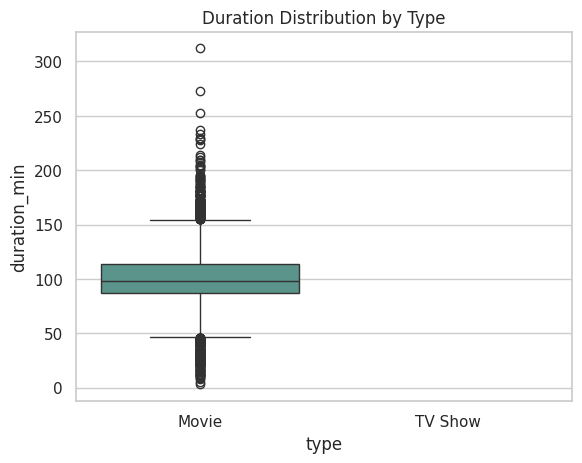

In [ ]:
sns.boxplot(data=data, x="type", y="duration_min", palette="crest")
plt.title("Duration Distribution by Type")
plt.show()


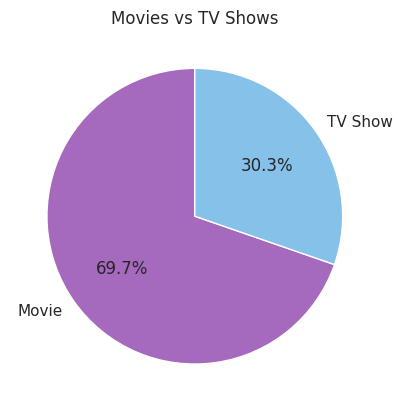

In [ ]:
data['type'].value_counts().plot.pie(autopct="%1.1f%%", colors=["#a569bd","#85c1e9"], startangle=90)
plt.ylabel("")
plt.title("Movies vs TV Shows")
plt.show()


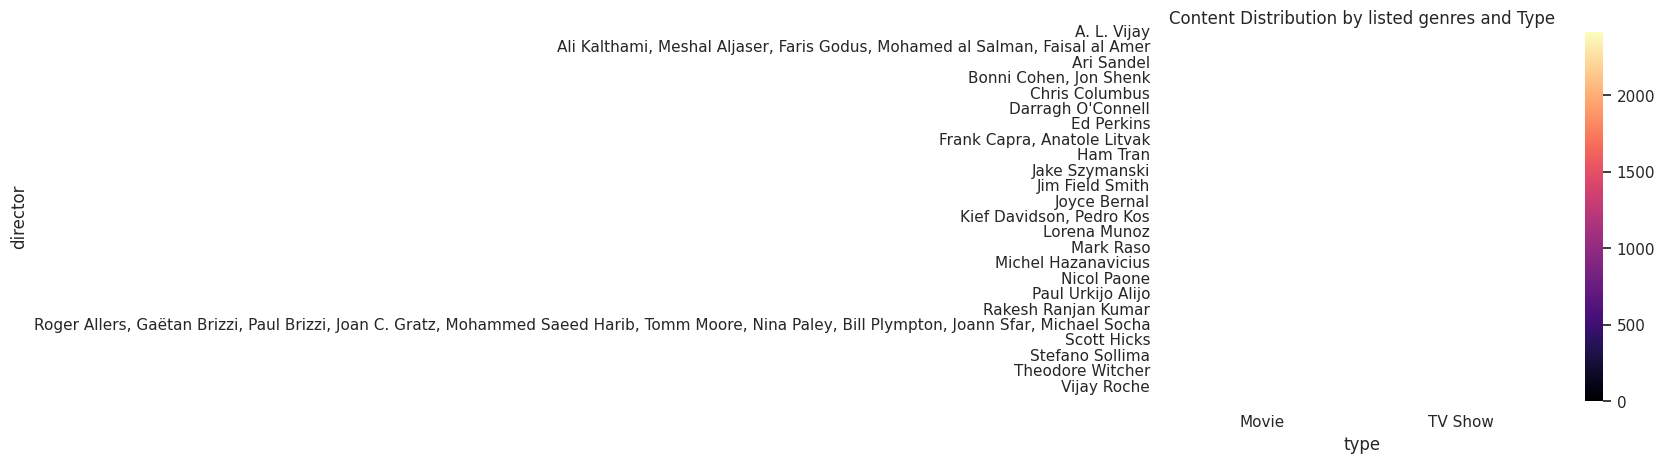

In [ ]:

cross_tab = pd.crosstab(data['director'], data['type'])
sns.heatmap(cross_tab, cmap="magma", linewidths=0.5)
plt.title("Content Distribution by listed genres and Type")
plt.show()


/tmp/ipython-input-3953621538.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




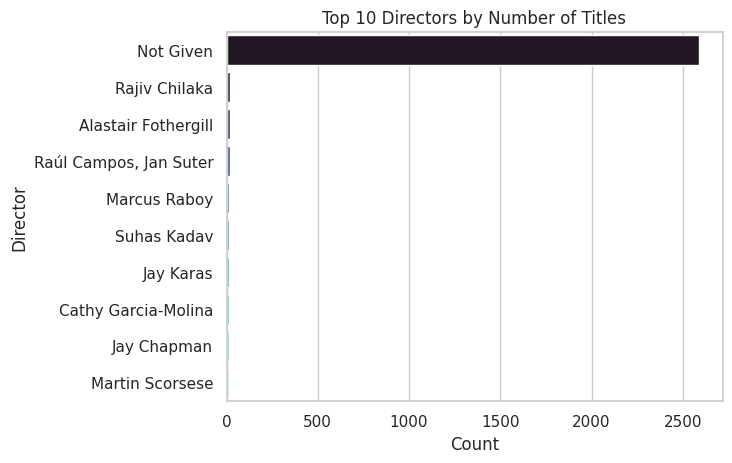

In [ ]:
top_directors = data['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette="mako")
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()


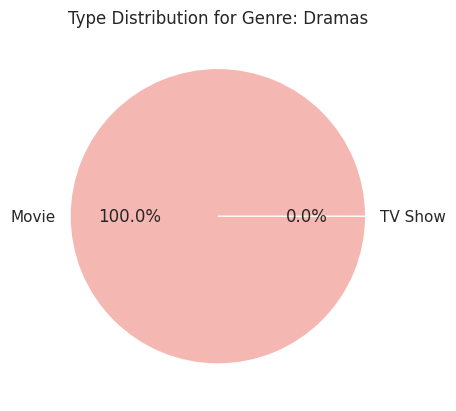

In [ ]:
# Extract main genre
data["main_genre"] = data["listed_in"].str.split(",").str[0]

# Group by type and genre
genre_type = data.groupby(["main_genre", "type"]).size().unstack(fill_value=0)

# Example: pick one genre and show its type split
genre = "Dramas"
subset = genre_type.loc[genre]

plt.pie(subset, labels=subset.index, autopct="%1.1f%%", colors=["#f5b7b1","#aed6f1"])
plt.title(f"Type Distribution for Genre: {genre}")
plt.show()


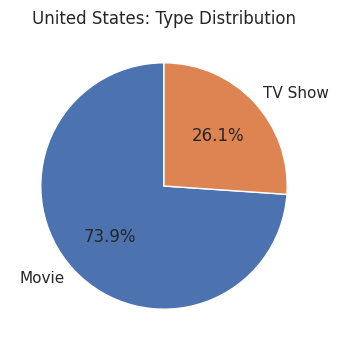

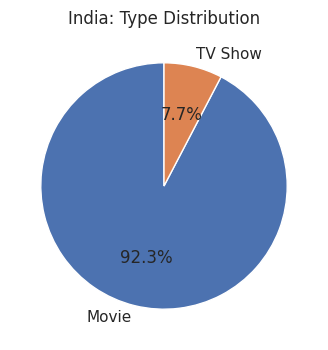

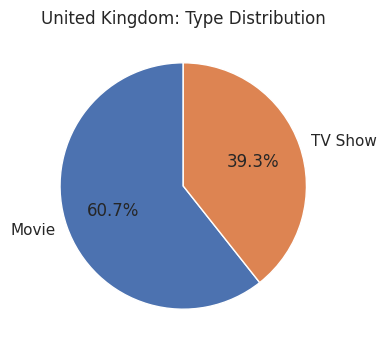

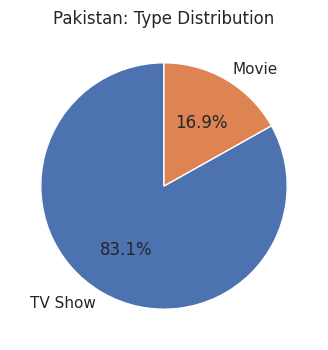

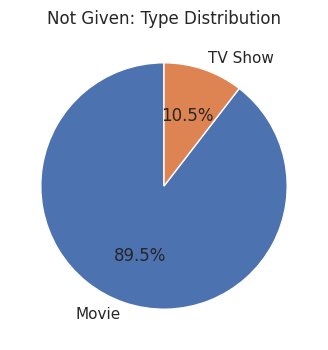

In [ ]:
top_countries = data["country"].value_counts().head(5).index

for c in top_countries:
    subset = data[data["country"] == c]["type"].value_counts()
    plt.figure(figsize=(4,4))
    plt.pie(subset, labels=subset.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"{c}: Type Distribution")
    plt.show()


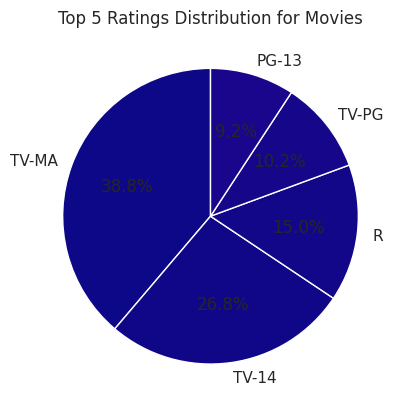

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

subset = data[data["type"] == "Movie"]["rating"].value_counts().head(5)

# Get colors from a colormap
colors = cm.plasma(range(len(subset)))

plt.pie(subset, labels=subset.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Top 5 Ratings Distribution for Movies")
plt.show()



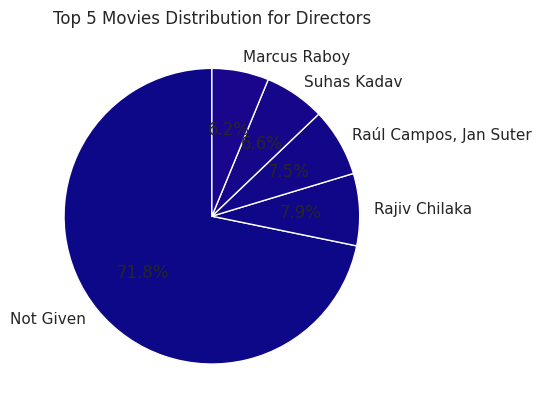

In [ ]:


subset = data[data["type"] == "Movie"]["director"].value_counts().head(5)

# Get colors from a colormap
colors = cm.plasma(range(len(subset)))

plt.pie(subset, labels=subset.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Top 5 Movies Distribution for Directors")
plt.show()


In [ ]:
# Separate movies and TV Shows
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)
data['duration_type'] = data['duration'].str.extract('([a-zA-Z]+)')

# Convert TV show seasons into approximate minutes
data.loc[data['duration_type'].str.contains('Season', na=False), 'duration_num'] *= 60


<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-1057252878.py:2: SyntaxWarning:

invalid escape sequence '\d'



In [ ]:
data['num_genres'] = data['listed_in'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)


In [ ]:
data

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2021-09-25          2020  PG-13     90 min   
1            France 2021-09-24          2021  TV-MA   1 Season   
2     United States 2021-09-24          2021  TV-MA   1 Season   
3            Brazil 2021-09-22          2021  TV-PG     91 min   
4     United States 2021-09-24          1993  TV-MA    125 min   
...             ...        ...           ...    ...        ...   
8785         Turkey 2017-01-17          2016  TV-PG  2 Seasons   
8786  United States 2018-09-13          2016  TV-Y7  3 Seasons   
8787       Pakistan 2016-12-15          2012  TV-PG   1 Season   
8788       Pakistan 2018-06-23          2016   TV-Y   1 Season   
8789       Pakistan 2018-06-07          2016  TV-Y7   1 Season   

                                              listed_in  ...  director_enc  \
0                                         Documentaries  ...          2294   
1     Crime TV Shows, International TV Shows, TV Act...  ...          2104   
2                    TV Dramas, TV Horror, TV Mysteries  ...          2865   
3                    Children & Family Movies, Comedies  ...           627   
4      Dramas, Independent Movies, International Movies  ...          1503   
...                                                 ...  ...           ...   
8785                  International TV Shows, TV Dramas  ...          3066   
8786                                           Kids' TV  ...          3066   
8787  International TV Shows, Romantic TV Shows, TV ...  ...          3066   
8788                                           Kids' TV  ...          3066   
8789                                           Kids' TV  ...          3066   

      country_enc  type_enc  genre_count  duration_min  month_added  \
0              80         0            1          90.0            9   
1              20         1            3           NaN            9   
2              80         1            3           NaN            9   
3               6         0            2          91.0            9   
4              80         0            3         125.0            9   
...           ...       ...          ...           ...          ...   
8785           76         1            2           NaN            1   
8786           80         1            1           NaN            9   
8787           52         1            3           NaN           12   
8788           52         1            1           NaN            6   
8789           52         1            1           NaN            6   

                    main_genre duration_num  duration_type num_genres  
0                Documentaries         90.0            min          1  
1               Crime TV Shows         60.0         Season          3  
2                    TV Dramas         60.0         Season          3  
3     Children & Family Movies         91.0            min          2  
4                       Dramas        125.0            min          3  
...                        ...          ...            ...        ...  
8785 

In [ ]:
top_directors = data['director'].value_counts().head(10).index
data['top_director'] = data['director'].apply(lambda x: x if x in top_directors else 'Other')


In [ ]:
data

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country date_added  release_year rating   duration  \
0     United States 2021-09-25          2020  PG-13     90 min   
1            France 2021-09-24          2021  TV-MA   1 Season   
2     United States 2021-09-24          2021  TV-MA   1 Season   
3            Brazil 2021-09-22          2021  TV-PG     91 min   
4     United States 2021-09-24          1993  TV-MA    125 min   
...             ...        ...           ...    ...        ...   
8785         Turkey 2017-01-17          2016  TV-PG  2 Seasons   
8786  United States 2018-09-13          2016  TV-Y7  3 Seasons   
8787       Pakistan 2016-12-15          2012  TV-PG   1 Season   
8788       Pakistan 2018-06-23          2016   TV-Y   1 Season   
8789       Pakistan 2018-06-07          2016  TV-Y7   1 Season   

                                              listed_in  ...  country_enc  \
0                                         Documentaries  ...           80   
1     Crime TV Shows, International TV Shows, TV Act...  ...           20   
2                    TV Dramas, TV Horror, TV Mysteries  ...           80   
3                    Children & Family Movies, Comedies  ...            6   
4      Dramas, Independent Movies, International Movies  ...           80   
...                                                 ...  ...          ...   
8785                  International TV Shows, TV Dramas  ...           76   
8786                                           Kids' TV  ...           80   
8787  International TV Shows, Romantic TV Shows, TV ...  ...           52   
8788                                           Kids' TV  ...           52   
8789                                           Kids' TV  ...           52   

      type_enc  genre_count  duration_min  month_added  \
0            0            1          90.0            9   
1            1            3           NaN            9   
2            1            3           NaN            9   
3            0            2          91.0            9   
4            0            3         125.0            9   
...        ...          ...           ...          ...   
8785         1            2           NaN            1   
8786         1            1           NaN            9   
8787         1            3           NaN           12   
8788         1            1           NaN            6   
8789         1            1           NaN            6   

                    main_genre  duration_num duration_type  num_genres  \
0                Documentaries          90.0           min           1   
1               Crime TV Shows          60.0        Season           3   
2                    TV Dramas          60.0        Season           3   
3     Children & Family Movies          91.0           min           2   
4                       Dramas         125.0           min           3   
...                        ...           ...           ...         ...   
8785    International TV Shows         120.0       Seasons           2   
8786                  Kids' TV         180.0       Seasons           1   
8787    Int

from matplotlib import pyplot as plt
data['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['year_added'].plot(kind='hist', bins=20, title='year_added')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['director_enc'].plot(kind='hist', bins=20, title='director_enc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['country_enc'].plot(kind='hist', bins=20, title='country_enc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('duration_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='release_year', y='year_added', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='year_added', y='director_enc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='director_enc', y='country_enc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='country_enc', y='type_enc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('duration_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='duration_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['year_added']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('year_added')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['year_added']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('duration_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='duration_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('year_added')

from matplotlib import pyplot as plt
data['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['year_added'].plot(kind='line', figsize=(8, 4), title='year_added')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['director_enc'].plot(kind='line', figsize=(8, 4), title='director_enc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['country_enc'].plot(kind='line', figsize=(8, 4), title='country_enc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['duration_type'].value_counts()
    for x_label, grp in data.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('duration_type')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='release_year', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['duration_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='release_year', y='duration_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='year_added', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['duration_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='year_added', y='duration_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
def get_age_category(rating):
    if rating in ['TV-MA', 'R']:
        return 'Adult'
    elif rating in ['TV-14', 'PG-13']:
        return 'Teen'
    elif rating in ['TV-G', 'G', 'PG']:
        return 'Family'
    else:
        return 'Unknown'

data['age_category'] = data['rating'].apply(get_age_category)


In [ ]:
data['is_movie'] = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)


In [ ]:
features = data[['duration_num', 'num_genres', 'is_movie']]
features = features.fillna(0)


In [ ]:
# Top 10 most frequent movies
top_titles = data['title'].value_counts().head(10)
print(top_titles)

# OR by average rating (if available)
top_rated = data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(top_rated)


title
9-Feb                                2
15-Aug                               2
22-Jul                               2
Septiembre, un llanto en silencio    1
Set Up                               1
Sex and the City 2                   1
Sex and the City: The Movie          1
Sex Doll                             1
Sexo, Pudor y Lagrimas               1
Shelter                              1
Name: count, dtype: int64
title
22-Jul                        2
9-Feb                         2
15-Aug                        2
Riot                          1
Riphagen - The Untouchable    1
Ripper Street                 1
Rise of Empires: Ottoman      1
Rise of the Zombie            1
Rise: Ini Kalilah             1
Rishta.com                    1
Name: rating, dtype: int64


In [ ]:
import pandas as pd

# Example: Assuming your dataframe is named 'data'
# and has a column 'listed_in' containing genres like "Action, Drama, Thriller"

def recommend_by_genre(genre, n=10):
    # Convert both to lowercase for consistent matching
    genre = genre.lower()

    # Filter rows that contain the given genre
    matches = data[data['listed_in'].str.lower().str.contains(genre, na=False)]

    if matches.empty:
        print(f"No movies found for genre '{genre}'. Try another one.")
        return None

    # Randomly sample top results
    return matches[['title', 'type', 'country', 'listed_in']].sample(n=min(n, len(matches)), random_state=1)

# 🔹 Example usage
recommend_by_genre("Romantic")


title     type  \
8530                                  Kurt Seyit & Sura  TV Show   
1811                                       It's Her Day    Movie   
4021  Michael Bolton's Big, Sexy Valentine's Day Spe...    Movie   
7477                                   My MVP Valentine  TV Show   
6880                                       Firefly Lane  TV Show   
5517                                           My Ex-Ex    Movie   
2654                                             Malaal    Movie   
8522                                             Khaani  TV Show   
5124                    I Fine... Thank You... Love You    Movie   
4653                                     Chal Mere Bhai    Movie   

            country                                          listed_in  
8530         Turkey  International TV Shows, Romantic TV Shows, TV ...  
1811        Nigeria    Comedies, International Movies, Romantic Movies  
4021  United States        Comedies, Music & Musicals, Romantic Movies  
7477         Taiwan  International TV Shows, Romantic TV Shows, TV ...  
6880  United States                       Romantic TV Shows, TV Dramas  
5517         Canada                          Comedies, Romantic Movies  
2654          India      Dramas, International Movies, Romantic Movies  
8522       Pakistan  Crime TV Shows, International TV Shows, Romant...  
5124       Thailand    Comedies, International Movies, Romantic Movies  
4653          India    Comedies, International Movies, Romantic Movies

In [ ]:
data1=pd.read_csv("/content/netflix1.csv")
data1.columns = data1.columns.str.lower()

# Find genre column name
genre_col = 'listed_in' if 'listed_in' in data1.columns else 'genre'

# Drop missing values
data1 = data1.dropna(subset=[genre_col, 'title']).reset_index(drop=True)

In [ ]:
data1

show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States   9/25/2021          2020  PG-13     90 min   
1            France   9/24/2021          2021  TV-MA   1 Season   
2     United States   9/24/2021          2021  TV-MA   1 Season   
3            Brazil   9/22/2021          2021  TV-PG     91 min   
4     United States   9/24/2021          1993  TV-MA    125 min   
...             ...         ...           ...    ...        ...   
8785         Turkey   1/17/2017          2016  TV-PG  2 Seasons   
8786  United States   9/13/2018          2016  TV-Y7  3 Seasons   
8787       Pakistan  12/15/2016          2012  TV-PG   1 Season   
8788       Pakistan   6/23/2018          2016   TV-Y   1 Season   
8789       Pakistan    6/7/2018          2016  TV-Y7   1 Season   

                                              listed_in  
0                                         Documentaries  
1     Crime TV Shows, International TV Shows, TV Act...  
2                    TV Dramas, TV Horror, TV Mysteries  
3                    Children & Family Movies, Comedies  
4      Dramas, Independent Movies, International Movies  
...                                                 ...  
8785                  International TV Shows, TV Dramas  
8786                                           Kids' TV  
8787  International TV Shows, Romantic TV Shows, TV ...  
8788                                           Kids' TV  
8789                                           Kids' TV  

[8790 rows x 10 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Convert genres to bag-of-words format
count = CountVectorizer(tokenizer=lambda x: x.split(','))
count_matrix = count.fit_transform(data1[genre_col])

# Compute cosine similarity between all movies
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Index for quick title lookup
indices = pd.Series(data1.index, index=data1['title']).drop_duplicates()


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
def recommend_movie(title, cosine_sim=cosine_sim):
    if title not in indices:
        return f"'{title}' not found in dataset. Try another movie."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]

    return data1[['title', genre_col]].iloc[movie_indices]


In [ ]:
recommend_movie("Chappie")   # Replace with any title from your dataset


title                             listed_in
205                   Green Lantern  Action & Adventure, Sci-Fi & Fantasy
466                         Beowulf  Action & Adventure, Sci-Fi & Fantasy
729                   Mortal Kombat  Action & Adventure, Sci-Fi & Fantasy
742                       Star Trek  Action & Adventure, Sci-Fi & Fantasy
977                        Stargate  Action & Adventure, Sci-Fi & Fantasy
980                The Darkest Hour  Action & Adventure, Sci-Fi & Fantasy
994             Battle: Los Angeles  Action & Adventure, Sci-Fi & Fantasy
1049                      Time Trap  Action & Adventure, Sci-Fi & Fantasy
1096                           2012  Action & Adventure, Sci-Fi & Fantasy
1102  Kingsglaive: Final Fantasy XV  Action & Adventure, Sci-Fi & Fantasy

In [ ]:
def recommend_by_genre(genre, n=10):
    genre = genre.lower()
    matches = data1[data1[genre_col].str.lower().str.contains(genre, na=False)]
    return matches[['title', genre_col]].sample(n=min(n, len(matches)), random_state=1)

# Example:
recommend_by_genre("Romantic")


title  \
8530                                  Kurt Seyit & Sura   
1811                                       It's Her Day   
4021  Michael Bolton's Big, Sexy Valentine's Day Spe...   
7477                                   My MVP Valentine   
6880                                       Firefly Lane   
5517                                           My Ex-Ex   
2654                                             Malaal   
8522                                             Khaani   
5124                    I Fine... Thank You... Love You   
4653                                     Chal Mere Bhai   

                                              listed_in  
8530  International TV Shows, Romantic TV Shows, TV ...  
1811    Comedies, International Movies, Romantic Movies  
4021        Comedies, Music & Musicals, Romantic Movies  
7477  International TV Shows, Romantic TV Shows, TV ...  
6880                       Romantic TV Shows, TV Dramas  
5517                          Comedies, Romantic Movies  
2654      Dramas, International Movies, Romantic Movies  
8522  Crime TV Shows, International TV Shows, Romant...  
5124    Comedies, International Movies, Romantic Movies  
4653    Comedies, International Movies, Romantic Movies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data1['text']=data1['listed_in'].fillna('')+''+data1['country'].fillna('')+''+data1['director'].fillna('')
tfdif=TfidfVectorizer(stop_words='english')
x=tfdif.fit_transform(data1['text'])
y=data1['type']

X_train,y_train,X_val,y_val=train_test_split(x,y,test_size=0.2,random_state=42)


**LOGISTIC REGRESSION PREDICTING MOVIE OR SHOW**


In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,X_val)

LogisticRegression(max_iter=1000)

In [ ]:
pred=model.predict(y_train)
print("Accuracy:", accuracy_score(y_val, pred))
print(classification_report(y_val, pred))

Accuracy: 0.9891922639362912
              precision    recall  f1-score   support

       Movie       0.98      1.00      0.99      1238
     TV Show       1.00      0.96      0.98       520

    accuracy                           0.99      1758
   macro avg       0.99      0.98      0.99      1758
weighted avg       0.99      0.99      0.99      1758



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Encode categorical variables
le = LabelEncoder()
data['rating_encoded'] = le.fit_transform(data['rating'].astype(str))

# Features: release_year + duration length
data['duration'] = data['duration'].str.extract('(\d+)').fillna(0).astype(int)

X = data[['release_year', 'duration']]
y = data['rating_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


<>:9: SyntaxWarning:

invalid escape sequence '\d'

<>:9: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipython-input-3814623516.py:9: SyntaxWarning:

invalid escape sequence '\d'



Accuracy: 0.366325369738339


In [ ]:
from sklearn.cluster import KMeans
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data1['listed_in'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data1['cluster'] = kmeans.fit_predict(X)

                                 title  \
0                 Dick Johnson Is Dead   
1                            Ganglands   
2                        Midnight Mass   
3     Confessions of an Invisible Girl   
4                              Sankofa   
...                                ...   
8785                        Yunus Emre   
8786                         Zak Storm   
8787                Zindagi Gulzar Hai   
8788                              Yoko   
8789                               YOM   

                                              listed_in  cluster  
0                                         Documentaries        2  
1     Crime TV Shows, International TV Shows, TV Act...        1  
2                    TV Dramas, TV Horror, TV Mysteries        1  
3                    Children & Family Movies, Comedies        0  
4      Dramas, Independent Movies, International Movies        0  
...                                                 ...      ...  
8785                  Inte

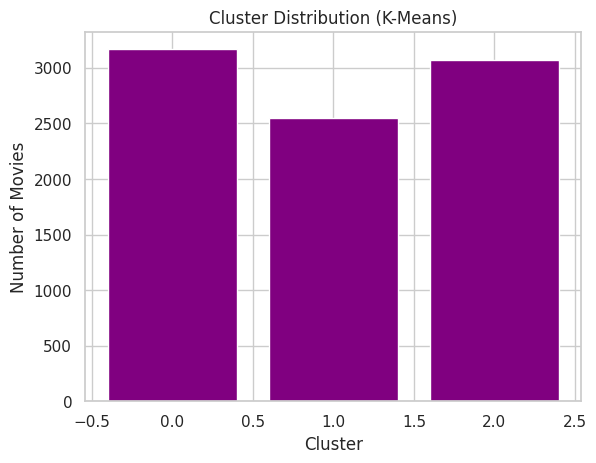

In [ ]:
print(data1[['title', 'listed_in', 'cluster']])

# Visualize cluster distribution
plt.bar(data1['cluster'].value_counts().index, data1['cluster'].value_counts().values, color='purple')
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
X_1 = tfidf.fit_transform(data1['type'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data1['cluster'] = kmeans.fit_predict(X_1)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.



                                 title     type  cluster
0                 Dick Johnson Is Dead    Movie        0
1                            Ganglands  TV Show        1
2                        Midnight Mass  TV Show        1
3     Confessions of an Invisible Girl    Movie        0
4                              Sankofa    Movie        0
...                                ...      ...      ...
8785                        Yunus Emre  TV Show        1
8786                         Zak Storm  TV Show        1
8787                Zindagi Gulzar Hai  TV Show        1
8788                              Yoko  TV Show        1
8789                               YOM  TV Show        1

[8790 rows x 3 columns]


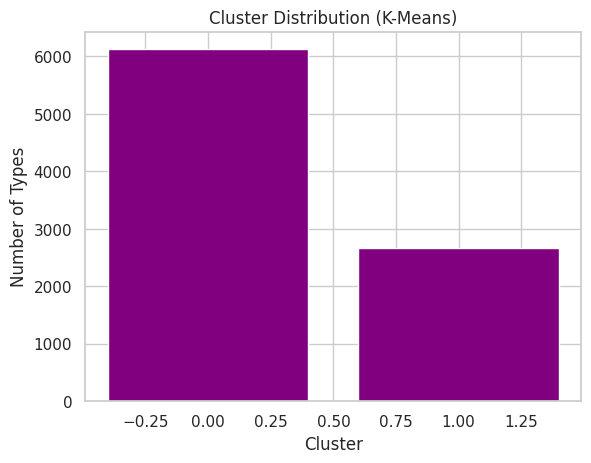

In [ ]:
print(data1[['title', 'type', 'cluster']])

# Visualize cluster distribution
plt.bar(data1['cluster'].value_counts().index, data1['cluster'].value_counts().values, color='purple')
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Types')
plt.show()

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
X_2 = tfidf.fit_transform(data1['director'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data1['cluster'] = kmeans.fit_predict(X_2)

                                 title         director  cluster
0                 Dick Johnson Is Dead  Kirsten Johnson        0
1                            Ganglands  Julien Leclercq        0
2                        Midnight Mass    Mike Flanagan        0
3     Confessions of an Invisible Girl    Bruno Garotti        0
4                              Sankofa     Haile Gerima        0
...                                ...              ...      ...
8785                        Yunus Emre        Not Given        1
8786                         Zak Storm        Not Given        1
8787                Zindagi Gulzar Hai        Not Given        1
8788                              Yoko        Not Given        1
8789                               YOM        Not Given        1

[8790 rows x 3 columns]


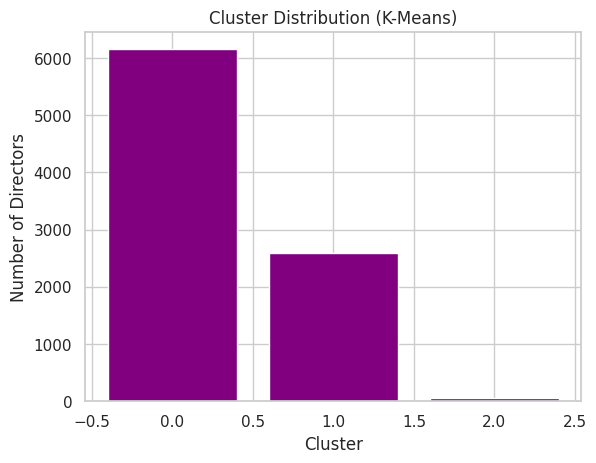

In [ ]:
print(data1[['title', 'director', 'cluster']])

# Visualize cluster distribution
plt.bar(data1['cluster'].value_counts().index, data1['cluster'].value_counts().values, color='purple')
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Directors')
plt.show()


Sample Clustered Movies:
                              title  \
0              Dick Johnson Is Dead   
1                         Ganglands   
2                     Midnight Mass   
3  Confessions of an Invisible Girl   
4                           Sankofa   
5     The Great British Baking Show   
6                      The Starling   
7   Motu Patlu in the Game of Zones   
8                      Je Suis Karl   
9          Motu Patlu in Wonderland   

                                           listed_in  Cluster  
0                                      Documentaries        2  
1  Crime TV Shows, International TV Shows, TV Act...        1  
2                 TV Dramas, TV Horror, TV Mysteries        1  
3                 Children & Family Movies, Comedies        0  
4   Dramas, Independent Movies, International Movies        0  
5                       British TV Shows, Reality TV        1  
6                                   Comedies, Dramas        3  
7  Children & Family Movies, Com

/tmp/ipython-input-3614617983.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




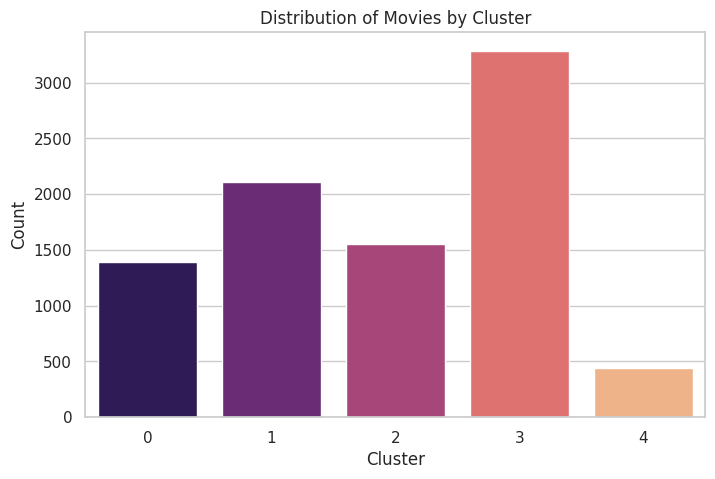

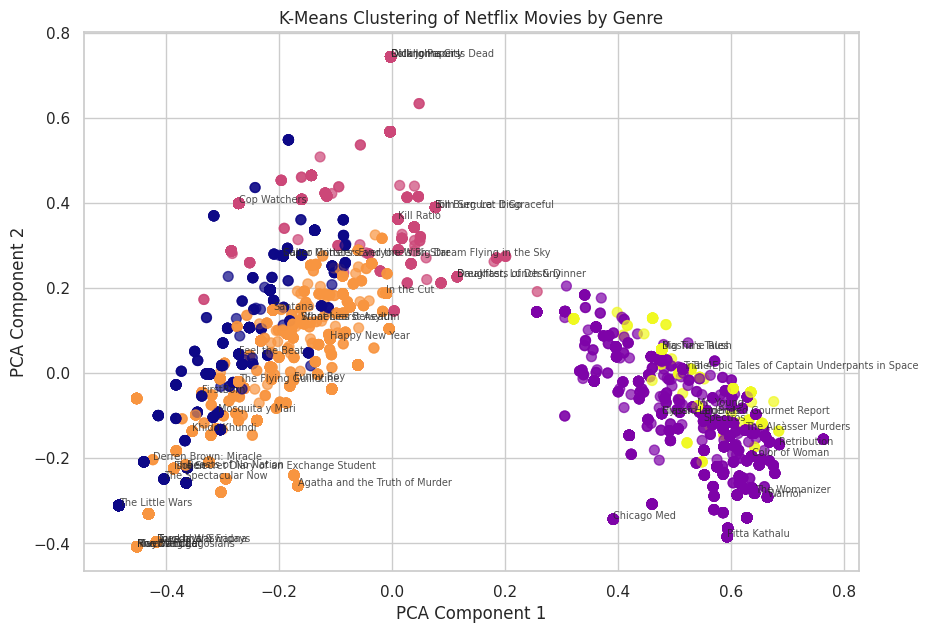

In [ ]:

from sklearn.decomposition import PCA


# ---------------------------
# Step 1: Load Dataset
# ---------------------------
# Replace 'netflix.csv' with your actual file name
data = pd.read_csv("/content/netflix1.csv")

# Keep only useful columns
data = data[['title', 'listed_in', 'type', 'country', 'release_year']]

# Drop missing values
data.dropna(subset=['listed_in'], inplace=True)

# ---------------------------
# Step 2: Convert Genres to TF-IDF
# ---------------------------
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['listed_in'])

# ---------------------------
# Step 3: Fit K-Means Clustering
# ---------------------------
# You can adjust n_clusters (e.g. 3–8) to see what groups form
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# ---------------------------
# Step 4: Inspect Results
# ---------------------------
print("\nSample Clustered Movies:")
print(data[['title', 'listed_in', 'Cluster']].head(10))

# ---------------------------
# Step 5: Visualize Cluster Distribution
# ---------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=data, palette='magma')
plt.title("Distribution of Movies by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# ---------------------------
# Step 6: Visualize in 2D using PCA
# ---------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,7))
plt.scatter(reduced[:,0], reduced[:,1], c=data['Cluster'], cmap='plasma', s=50, alpha=0.7)
plt.title("K-Means Clustering of Netflix Movies by Genre")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Annotate a few random points
for i in range(0, len(data), max(1, len(data)//50)):
    plt.annotate(data['title'].iloc[i], (reduced[i,0], reduced[i,1]), fontsize=7, alpha=0.8)

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
data2=pd.read_csv("/content/netflix1.csv")
df=data2[['type','director','rating','country','listed_in','release_year']].copy()

In [ ]:
df.dropna(inplace=True)

In [ ]:
le={}
for col in ['rating','country','director','listed_in']:
    enc=LabelEncoder()
    df[col]=enc.fit_transform(df[col])
    le[col]=enc
te=LabelEncoder()
df['type'] = te.fit_transform(df['type'])

In [ ]:
df

type  director  rating  country  listed_in  release_year
0        0      2294       4       80        273          2020
1        1      2104       8       20        241          2021
2        1      2865       8       80        498          2021
3        0       627       9        6        124          2021
4        0      1503       8       80        318          1993
...    ...       ...     ...      ...        ...           ...
8785     1      3066       9       76        411          2016
8786     1      3066      11       80        421          2016
8787     1      3066       9       52        393          2012
8788     1      3066      10       52        421          2016
8789     1      3066      11       52        421          2016

[8790 rows x 6 columns]

In [ ]:
x=df[['director','rating','country','listed_in','release_year']]
y=df['type']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_dt = dtree.predict(X_test)

# Evaluate
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.9715585893060296
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1238
           1       0.95      0.95      0.95       520

    accuracy                           0.97      1758
   macro avg       0.97      0.97      0.97      1758
weighted avg       0.97      0.97      0.97      1758



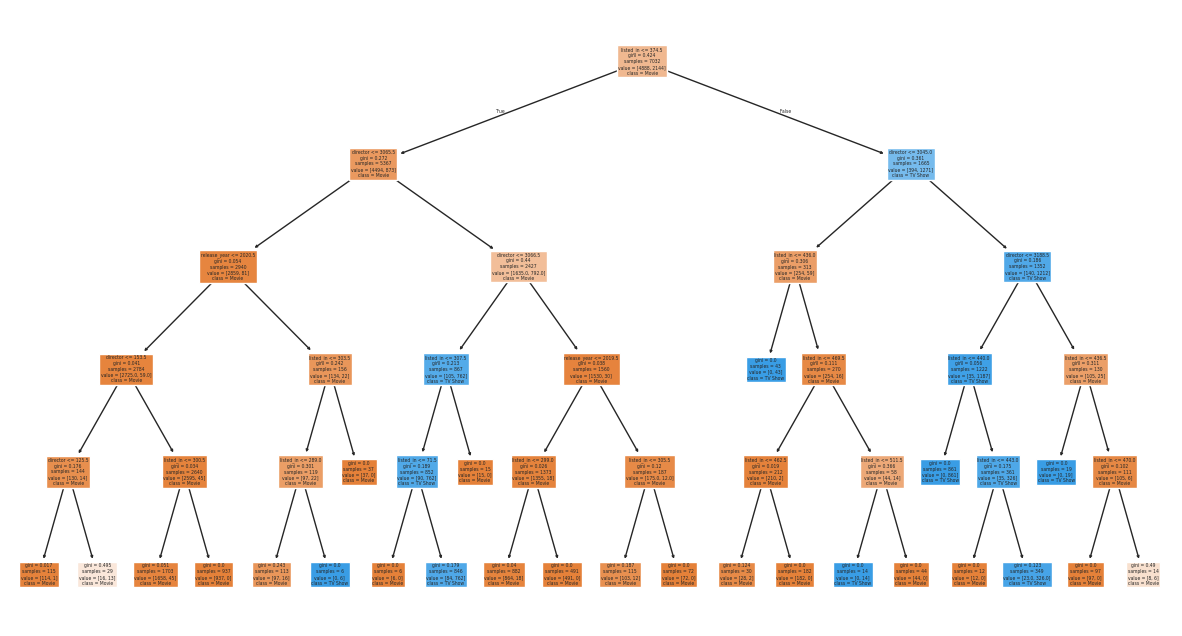

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(
    dtree,
    feature_names=x.columns,
    class_names=[str(c) for c in te.classes_],  # convert to string
    filled=True
)

plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print(" Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

 Random Forest Results:
Accuracy: 0.9920364050056882
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1238
           1       0.99      0.98      0.99       520

    accuracy                           0.99      1758
   macro avg       0.99      0.99      0.99      1758
weighted avg       0.99      0.99      0.99      1758



/tmp/ipython-input-352338727.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




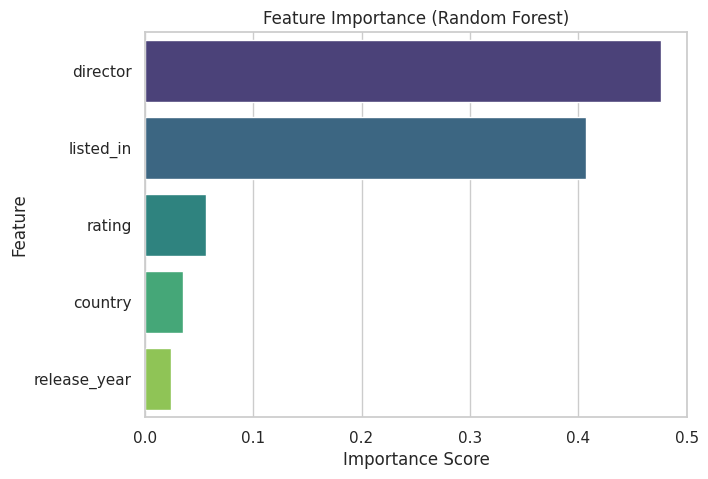

In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(x)

# Compare KMeans clusters with actual type labels
# Convert cluster labels to predicted classes (0/1)
acc_kmeans = silhouette_score(x, kmeans.labels_)

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
pred2=model.predict(X_test)

In [ ]:
pred_x=model.predict(X_test)

In [ ]:
pred_x = pred_x[0] if isinstance(pred_x, (list, np.ndarray)) else pred_x


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [ ]:
import numpy as np

def get_scalar(value):
    """Extract scalar from list/array if needed"""
    if isinstance(value, (list, np.ndarray)):
        return float(np.mean(value))  # or np.squeeze(value) if single element
    else:
        return float(value)

# Example — apply this to all your accuracy/silhouette variables
pred1 = get_scalar(pred_x)
dtree_acc = get_scalar(y_pred_dt)
rforest_acc = get_scalar(y_pred_rf)
kmeans_sil = get_scalar(acc_kmeans)


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'KMeans (Silhouette)'],
    'Accuracy': [pred1,dtree_acc,rforest_acc,kmeans_sil]
})

print(results)

                 Model  Accuracy
0  Logistic Regression  1.000000
1        Decision Tree  0.294653
2        Random Forest  0.292378
3  KMeans (Silhouette)  0.671794


/tmp/ipython-input-2982217866.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




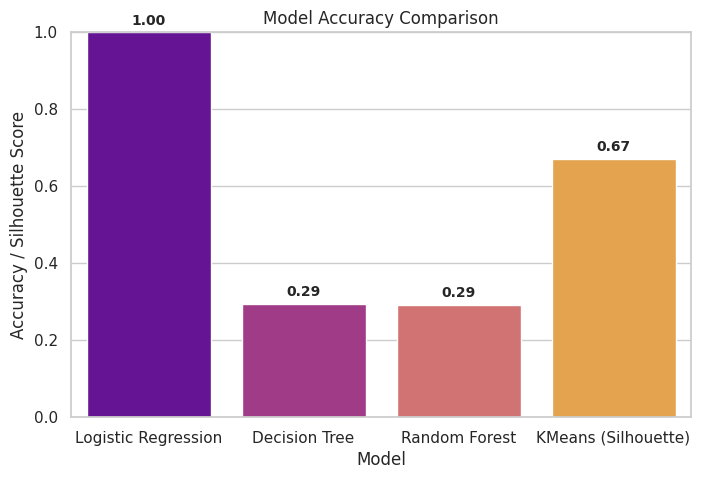

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='plasma')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy / Silhouette Score")
plt.ylim(0, 1)

# Add text labels above bars
for i, val in enumerate(results['Accuracy']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


/tmp/ipython-input-3009323939.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




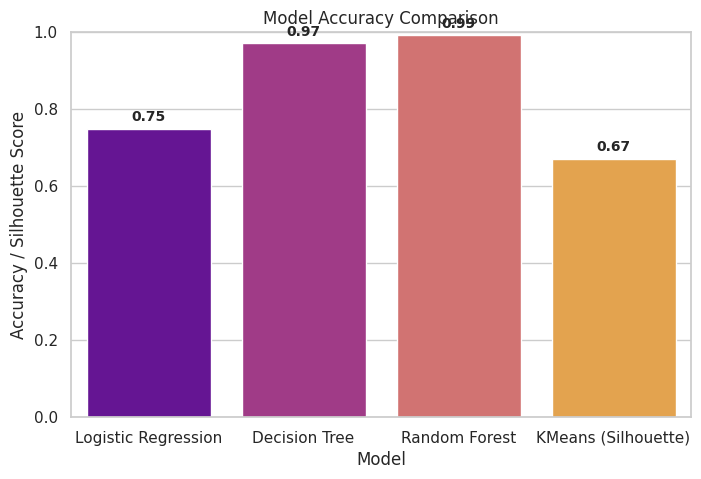

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: calculate accuracies from your predictions
logistic_acc = accuracy_score(y_test, pred2)
dtree_acc = accuracy_score(y_test, y_pred_dt)
rforest_acc = accuracy_score(y_test, y_pred_rf)
kmeans_sil = acc_kmeans  # silhouette score from KMeans

# Function to clean up if needed
def flatten_score(value):
    if isinstance(value, (list, np.ndarray)):
        return float(np.squeeze(value))  # removes [] if present
    return float(value)

# Cleaned scalar values
logistic_acc1 = flatten_score(logistic_acc)
dtree_acc1 = flatten_score(dtree_acc)
rforest_acc1 = flatten_score(rforest_acc)
kmeans_sil1 = flatten_score(kmeans_sil)

# Create dataframe for plotting
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KMeans (Silhouette)'],
    'Accuracy': [logistic_acc1, dtree_acc1, rforest_acc1, kmeans_sil1]
})

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='plasma')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy / Silhouette Score")
plt.ylim(0, 1)

for i, val in enumerate(results['Accuracy']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


In [ ]:
print(logistic_acc1, dtree_acc1, rforest_acc1, kmeans_sil1)


0.7497155858930603 0.9715585893060296 0.9920364050056882 0.6717944426604381


/tmp/ipython-input-4083406825.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




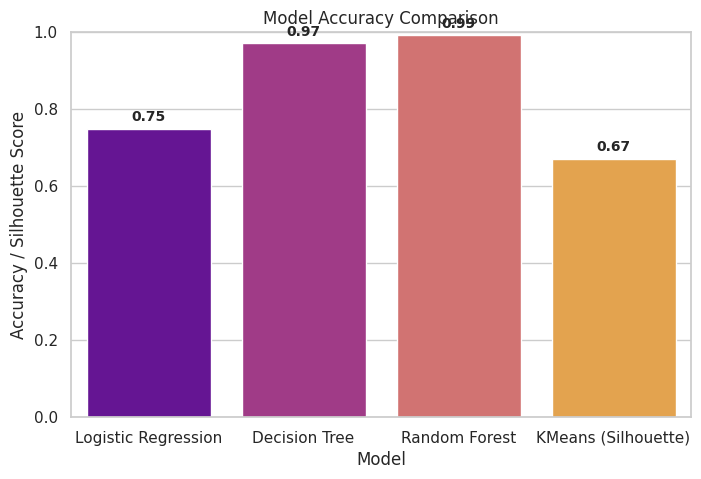

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KMeans (Silhouette)'],
    'Accuracy': [logistic_acc1, dtree_acc1, rforest_acc1, kmeans_sil1]
})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='plasma')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy / Silhouette Score")
plt.ylim(0, 1)

for i, val in enumerate(results['Accuracy']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


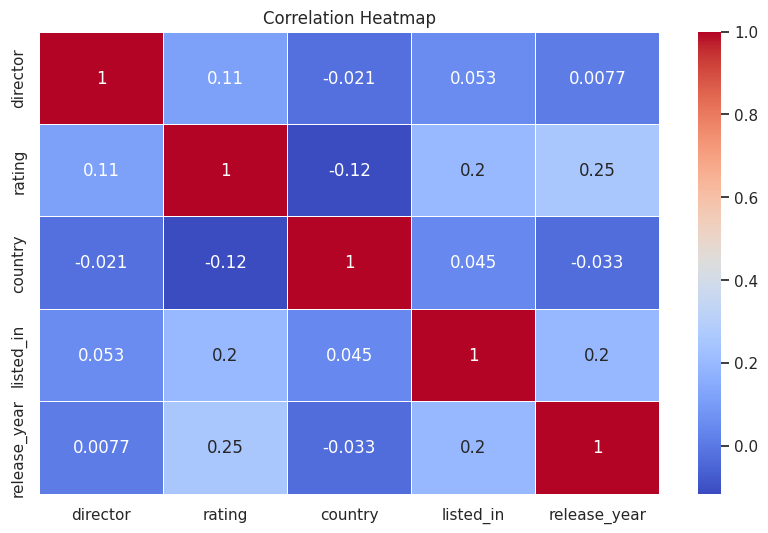

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


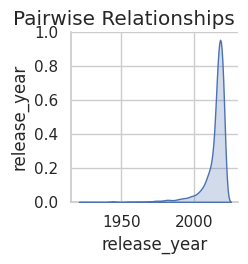

In [ ]:
sns.pairplot(data1[['listed_in','director','release_year', 'duration', 'rating']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()



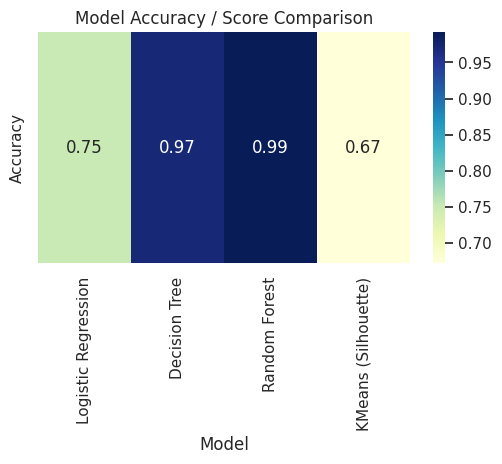

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(results.set_index('Model').T, annot=True, cmap='YlGnBu')
plt.title("Model Accuracy / Score Comparison")
plt.show()


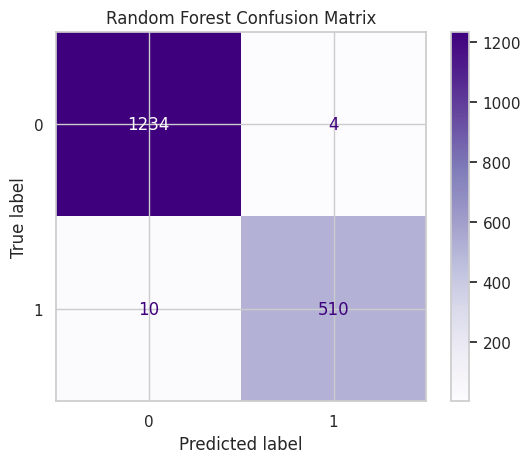

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Random Forest Confusion Matrix")
plt.show()


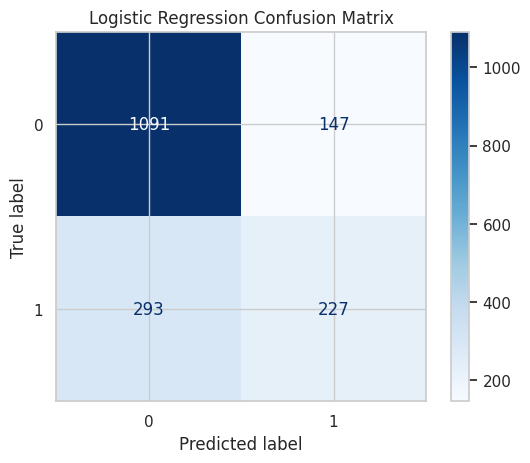

In [ ]:
cm = confusion_matrix(y_test, pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


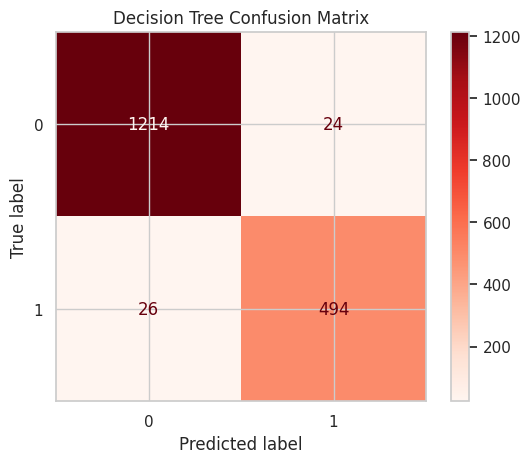

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Decision Tree Confusion Matrix")
plt.show()
